In [1]:
#机器学习--逻辑回归多分类---手写体识别
#authored by waitingfree 2021、12、10
#参考https://www.bilibili.com/video/BV1Xt411s7KY?p=5&spm_id_from=pageDriver

In [2]:
import numpy as np #科学计算向量库
import pandas as pd #文件IO
import matplotlib.pyplot as plt #导入画函数曲线的库
import scipy.io as sio #高级文件IO
from scipy.optimize import minimize

### 1.定义假设函数（模型）
### 2.定义损失函数（偏差）
### 3.定义优化策略（纠偏）
### 4.读数据并向量化X，theta，y

In [3]:
# 定义激活函数 logistic=1/[1+e^(-z)]
def sigmoid(z):
    #注意python的广播机制，这里的z可能不是一个数，而是一个numpy向量
    return 1/(1+np.exp(-z));

In [4]:
# 定义模型（假设函数） hypothesis=sigmoid(X*theta)
def hypothesis(X,theta):
    return sigmoid(X@theta)

In [5]:
# 定义模型的输出函数  f(假设函数)
def predict(X,theta_final):
    
    h = sigmoid(X@theta_final) #(5000,401) (401,10) =>(5000,10)
    
    h_argmax = np.argmax(h,axis=1)
    print(h_argmax.shape)
    return h_argmax

In [6]:
# 定义损失函数定义:对数几率 J = -1/m Σ[y*log(y_) + (1-y)*log(1-y_) ]
# 其中  y_=sigmoid（X@theta） ，一个细节：使用np.sum()来取代m次循环运算
def costFunction(X,y,theta):
    y_=sigmoid(X@theta)
    true_al=y*np.log(y_) #注意这里是*   不是 @，不能用矩阵乘法而应该对应位置相乘
    false_al=(1-y)*np.log(1-y_)#同上
    return np.sum(true_al+false_al)/len(y)*(-1)

In [7]:
#全局梯度下降函数  gradient=costFunction的导数=1/m*   X^T(Sigmoid(X@theta)−y)
def gradient(X,y,theta,alpha=0.02,iters=20000):
    costList=[] #存储损失的变化，用于画图
    for i in range(iters):
        y_hat=hypothesis(X,theta)
        theta=theta-(X.T@(y_hat-y))*alpha/len(X)
        cost=costFunction(X,y,theta)
        costList.append(cost)
    fig,ax=plt.subplots()#获得画图对象ax
    index=np.arange(0,iters)
    ax.plot(index,costList,'r',label="loss")#连续曲线
    ax.legend()#显示label
    ax.set(xlabel='iters',ylabel='loss',title='gradientDescent')
    plt.show()
    return theta

In [8]:
# 对于多分类问题，我们需要训练k个分类器
def o_v_a(X,y,theta_k,K):
    theta_final=[]
    #循环10次，训练十个分类器，并将结果保存在401*10的numpy向量中
    for i  in range(K):
        y_List=[]
        for iters in range(len(y)):
            if(y[iters]==i):
                y_List.append(1)
            else:
                y_List.append(0)
        y_List=np.array(y_List).reshape(len(y),1)
        theta_iter_i=np.array(theta_k[i]).reshape(len(theta_k[i]),1)
        theta_return=gradient(X,y_List,theta_iter_i)
        theta_final.append(theta_return)
    theta_final=np.array(theta_final).reshape(K,len(theta_k[0]))#原因在于转化时是行优先的
    
    return theta_final.T #将（401*10）的矩阵进行返回

In [9]:
#随机展示100张图片
def plot_100_image(X):
    
    sample_index = np.random.choice(len(X),100)
    images = X[sample_index,:]
    print(images.shape)
    fig,ax = plt.subplots(ncols=10,nrows=10,figsize=(8,8),sharex=True,sharey=True)
    for r in range(10):
        for c in range(10):          
            ax[r,c].imshow(images[10 * r + c].reshape(20,20).T,cmap='gray_r')   
    plt.xticks([])
    plt.yticks([])
    plt.show

In [10]:
# 从ex3data1.mat读数据，并结构化X  theta  y
data=sio.loadmat('ex3data1.mat') #读入数据，数据格式为（key,value）
raw_X=data['X']
raw_y=data['y']
print(raw_y.shape)
X  = np.insert(raw_X,0,values=1,axis=1)#在第0列插入一列1
y = raw_y.flatten()
print(y.shape)
theta = np.zeros((401)).reshape(401,1)
theta=theta-0.09

(5000, 1)
(5000,)


(100, 400)


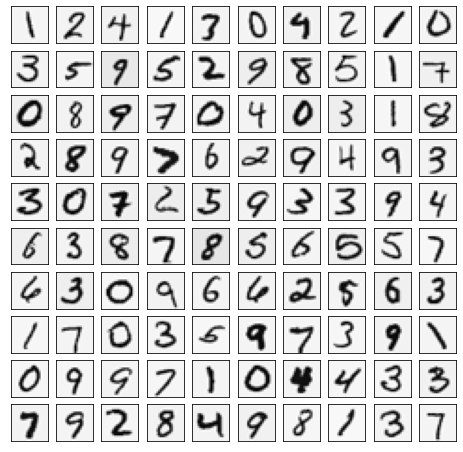

In [11]:
# 查看数据集
plot_100_image(raw_X)

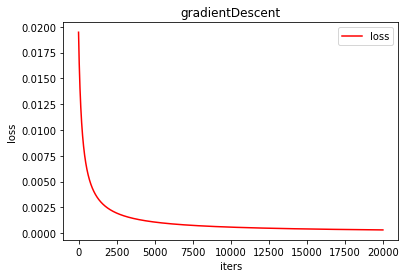

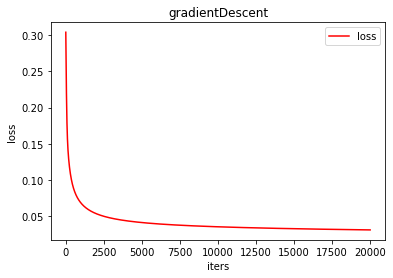

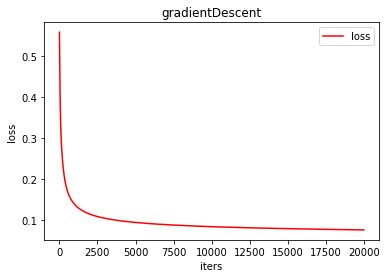

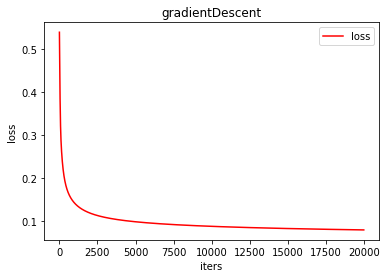

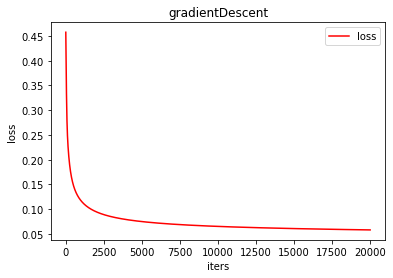

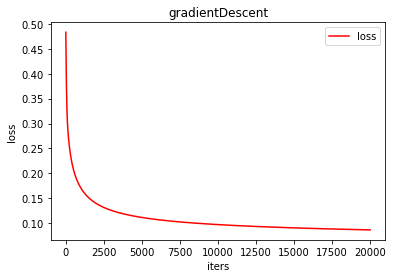

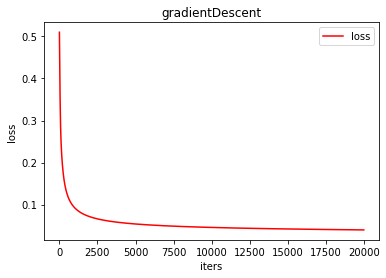

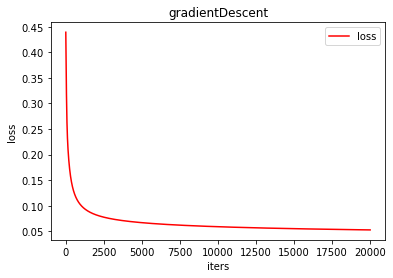

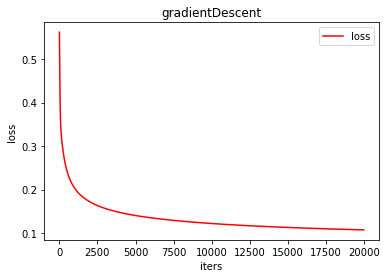

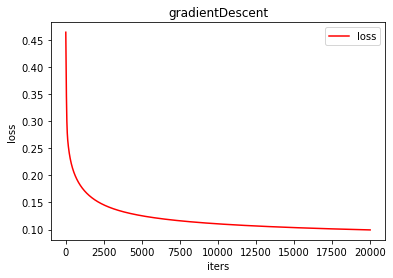

(401, 10)


In [12]:
# 进行多个二分类模型的训练，将训练结果保存到文件中
lamda  = 1 #正则项系数
K =10 #手写体识别共有10个类，这里采用one_vs_all策略，训练10个分类器
theta_k=[];
for i in range(K):
    theta_k.append(theta)
theta_final = o_v_a(X,y,theta_k,K)#函数最终返回  401*10  的矩阵
print(theta_final.shape)
np.save('LogisticWeight',theta_final)

In [13]:
y_pred = predict(X,theta_final)
acc = np.mean(y_pred == y)
print(acc)

(5000,)
0.823


In [14]:
def plot_an_image_and_predict(X,raw_X,theta_final):
    pick_one = np.random.randint(5000) 
    image = raw_X[pick_one,:]
    fig,ax = plt.subplots(figsize=(1,1))
    ax.imshow(image.reshape(20,20).T,cmap = 'gray_r')
    y_pred = predict(X[pick_one:pick_one+1,:],theta_final)
    print(y_pred)
    #plt.xticks([])
    #plt.yticks([])

(1,)
[9]


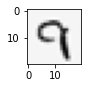

In [15]:
plot_an_image_and_predict(X,raw_X,theta_final)